In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
online_retail = pd.read_csv(r"D:\MIT WPU B.Tech Data\3nd Year Data\DM\online_retail.csv\online_retail.csv",header=None)
online_retail.head()

,0,1,2,3,4,5,6,7
0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
online_retail.shape 

(541910, 8)

In [9]:
market_data = online_retail.copy()

In [10]:
market_data = market_data.fillna('nan') 

In [11]:
market_data['combined'] = market_data.values.tolist()

In [12]:
market_data['combined'].head()

0    [InvoiceNo, StockCode, Description, Quantity, ...
1    [536365, 85123A, WHITE HANGING HEART T-LIGHT H...
2    [536365, 71053, WHITE METAL LANTERN, 6, 2010-1...
3    [536365, 84406B, CREAM CUPID HEARTS COAT HANGE...
4    [536365, 84029G, KNITTED UNION FLAG HOT WATER ...
Name: combined, dtype: object

In [13]:
data_list = list(market_data['combined']) 

In [14]:
market_data['combined'].head()

0    [InvoiceNo, StockCode, Description, Quantity, ...
1    [536365, 85123A, WHITE HANGING HEART T-LIGHT H...
2    [536365, 71053, WHITE METAL LANTERN, 6, 2010-1...
3    [536365, 84406B, CREAM CUPID HEARTS COAT HANGE...
4    [536365, 84029G, KNITTED UNION FLAG HOT WATER ...
Name: combined, dtype: object

In [15]:
print(data_list[0:5])

[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], ['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', '6', '2010-12-01 08:26:00', '2.55', '17850.0', 'United Kingdom'], ['536365', '71053', 'WHITE METAL LANTERN', '6', '2010-12-01 08:26:00', '3.39', '17850.0', 'United Kingdom'], ['536365', '84406B', 'CREAM CUPID HEARTS COAT HANGER', '8', '2010-12-01 08:26:00', '2.75', '17850.0', 'United Kingdom'], ['536365', '84029G', 'KNITTED UNION FLAG HOT WATER BOTTLE', '6', '2010-12-01 08:26:00', '3.39', '17850.0', 'United Kingdom']]


In [16]:
item_list = []  
for lst in data_list:
#     print(lst)
    items = []
    for ele in lst:
        if ele != 'nan':
#             print(ele)
            items.append(ele)
    item_list.append(items)

In [17]:
print(item_list[0:5])

[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], ['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', '6', '2010-12-01 08:26:00', '2.55', '17850.0', 'United Kingdom'], ['536365', '71053', 'WHITE METAL LANTERN', '6', '2010-12-01 08:26:00', '3.39', '17850.0', 'United Kingdom'], ['536365', '84406B', 'CREAM CUPID HEARTS COAT HANGER', '8', '2010-12-01 08:26:00', '2.75', '17850.0', 'United Kingdom'], ['536365', '84029G', 'KNITTED UNION FLAG HOT WATER BOTTLE', '6', '2010-12-01 08:26:00', '3.39', '17850.0', 'United Kingdom']]


In [18]:
from apyori import apriori

In [19]:
minimum_support = 0.003       
minimum_confidence = 0.50
min_lift = 3
min_length = 2

In [20]:
item_list = [[str(item) for item in transaction] for transaction in item_list]
association_rules = apriori(
    item_list,
    min_support=minimum_support,
    min_confidence=minimum_confidence,
    min_lift=min_lift,
    min_length=min_length
)

association_results = list(association_rules)


In [21]:
print(len(association_results))

21


In [22]:
association_results[0:10]

[RelationRecord(items=frozenset({'25', '0.42'}), support=0.008768983779594397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'25'}), items_add=frozenset({'0.42'}), confidence=0.927400468384075, lift=20.48537022875368)]),
 RelationRecord(items=frozenset({'Netherlands', '14646.0'}), support=0.0038475023527892085, ordered_statistics=[OrderedStatistic(items_base=frozenset({'14646.0'}), items_add=frozenset({'Netherlands'}), confidence=1.0, lift=228.55757064529732), OrderedStatistic(items_base=frozenset({'Netherlands'}), items_add=frozenset({'14646.0'}), confidence=0.8793757908055672, lift=228.55757064529732)]),
 RelationRecord(items=frozenset({'EIRE', '14911.0'}), support=0.010892952704323597, ordered_statistics=[OrderedStatistic(items_base=frozenset({'14911.0'}), items_add=frozenset({'EIRE'}), confidence=1.0, lift=66.11883845778428), OrderedStatistic(items_base=frozenset({'EIRE'}), items_add=frozenset({'14911.0'}), confidence=0.7202293801854563, lift=66.11883845778428)]),
 Rel

In [23]:
print(association_results[0])

RelationRecord(items=frozenset({'25', '0.42'}), support=0.008768983779594397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'25'}), items_add=frozenset({'0.42'}), confidence=0.927400468384075, lift=20.48537022875368)])


In [24]:
data = online_retail.values.ravel()

In [25]:
item_df = pd.DataFrame(data,columns=['items'])

In [26]:
item_df['items'].value_counts()[:10] 

items
United Kingdom    495478
1                 126655
2                  71597
12                 55444
1.25               45176
6                  36303
1.65               34965
4                  34316
3                  32262
2.95               23984
Name: count, dtype: int64

In [27]:
idx = item_df['items'].value_counts().index[:10]
val = item_df['items'].value_counts().values[:10]

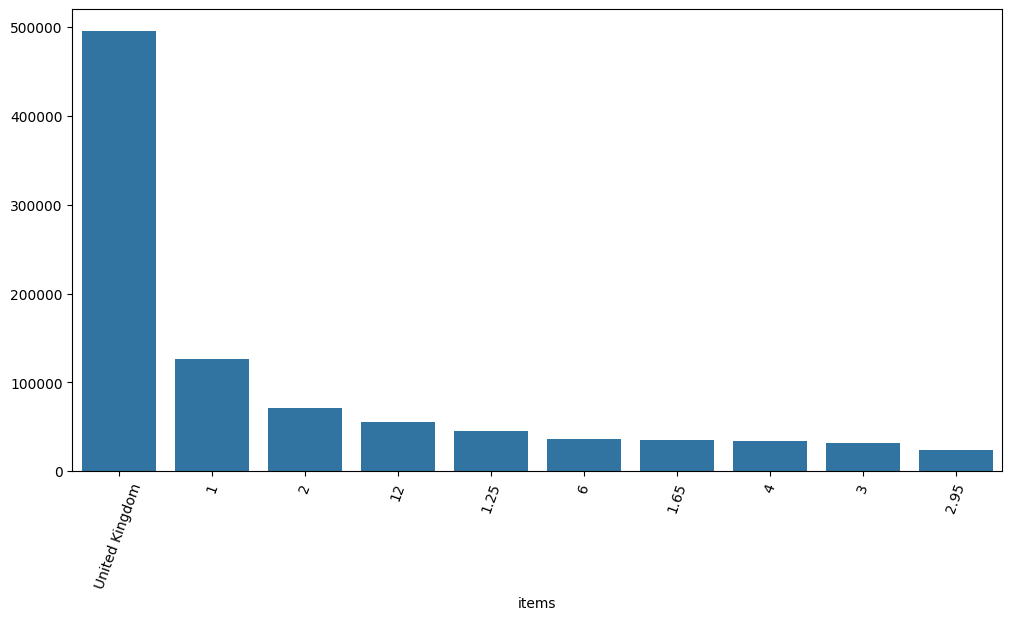

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x = idx, y = val)
plt.xticks(rotation = 70);

In [29]:
item_df['items'].value_counts()[::-1][:10]

items
C571220                1
571202                 1
2011-10-14 12:29:00    1
571204                 1
2011-10-14 12:34:00    1
571198                 1
2011-10-14 12:16:00    1
571199                 1
2011-10-14 12:19:00    1
10.85                  1
Name: count, dtype: int64